# ML lab 07-2 Practice

---

# MNIST data

> YouTube Lecture: [link](https://www.youtube.com/watch?v=ktd5yrki_KA&feature=youtu.be)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 3.114736492
Epoch: 0002 cost = 1.149441591
Epoch: 0003 cost = 0.912539234
Epoch: 0004 cost = 0.799070870
Epoch: 0005 cost = 0.727847744
Epoch: 0006 cost = 0.677132679
Epoch: 0007 cost = 0.638477706
Epoch: 0008 cost = 0.607590526
Epoch: 0009 cost = 0.581980535
Epoch: 0010 cost = 0.560312765
Epoch: 0011 cost = 0.541784786
Epoch: 0012 cost = 0.525653559
Epoch: 0013 cost = 0.511414955
Epoch: 0014 cost = 0.498345464
Epoch: 0015 cost = 0.486463564
Accuracy:  0.8862
Label: [7]
Prediction: [7]


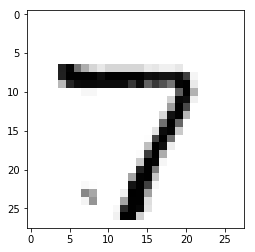

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
# Check out https://www.tensorflow.org/get_started/mnist/beginners
# for more information about the mnist dataset
import matplotlib.pyplot as plt
import random


mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print("Epoch:", "%04d" % (epoch + 1), "cost =", "{:.9f}".format(avg_cost))
    
    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess,
                                      feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1),
                                 feed_dict={X: mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap="Greys",interpolation="nearest")
    plt.show()

## epoch

- 전체 데이터셋을 한번 학습하는 것을 1 (one) epoch

- 데이터셋이 클 경우 데이터를 나누어서 학습시킨다. 이 사이즈를 batch size 라고 한다.